In [58]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\Diae\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [59]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import pandas as pd

In [60]:
def custom_where(cond, x_1, x_2):
    return (cond * x_1) + ((~(cond)) * x_2)

In [61]:
class Perceptron():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = torch.zeros(num_features, 1,dtype=torch.float32)
        self.bias = torch.zeros(1, dtype=torch.float32)
    def forward(self, x):
        linear = torch.add(torch.mm(x, self.weights), self.bias)
        predictions = custom_where(linear > 0., 1, 0).float()
        return predictions
    def backward(self, x, y):
        predictions = self.forward(x)
        errors = y - predictions
        return errors
    def train(self, x, y, epochs):
        for e in range(epochs):
            for i in range(y.size()[0]):
            # use view because backward expects a matrix (i.e., 2D tensor)
                errors = self.backward(x[i].view(1, self.num_features), y[i]).view(-1) 
                self.weights += (errors * x[i]).view(self.num_features, 1)
                self.bias += errors
    def evaluate(self, x, y):
        predictions = self.forward(x).view(-1)
        accuracy = torch.sum(predictions == y).float() / y.size()[0]
        return accuracy

In [62]:
data = pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [63]:
array = data.values
X, y = array[:,0:2] , array[:,8]
print(X)

[[  6. 148.]
 [  1.  85.]
 [  8. 183.]
 ...
 [  5. 121.]
 [  1. 126.]
 [  1.  93.]]


In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [65]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)


In [66]:
X_train.shape

(614, 2)

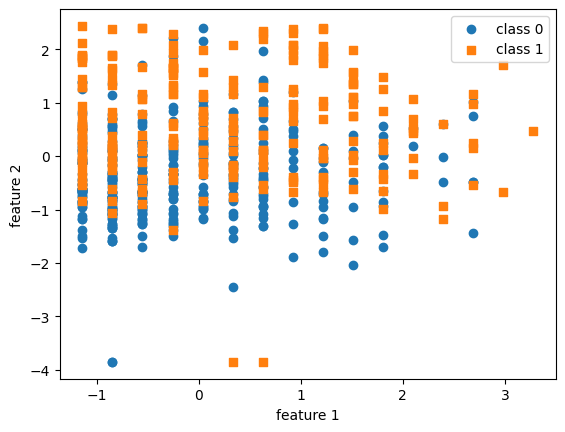

In [67]:
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker
='o')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker
='s')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()

In [68]:

ppn = Perceptron(num_features=2)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
ppn.train(X_train_tensor, y_train_tensor, epochs=5)
print('Model parameters:')
print(' Weights: %s' % ppn.weights)
print(' Bias: %s' % ppn.bias)



Model parameters:
 Weights: tensor([[2.3563],
        [2.9841]])
 Bias: tensor([0.])


In [69]:
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)
test_acc = ppn.evaluate(X_test_tensor, y_test_tensor)
print('Test set accuracy: %.2f%%' % (test_acc*100))

Test set accuracy: 72.73%
